<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_Exp_2_EDA_Cricket_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPERIMENT 2**





**21-03-2024**

# **DATA PREPROCESSING AND VISUALIZATION FOR BATSMEN DATASET**




># **2.A DATA PREPROCESSING**



**Importing Necessary Libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

**Importing Datasets**

In [ ]:
dataset1=pd.read_csv('/content/exp_2_data_1.csv')
dataset2=pd.read_csv('/content/exp_2_data_2.csv')

> Displaying Dataset Description Before Cleaning



In [ ]:
def display_description():
  #dataset 1
  print("\t DATASET 1\t")
  print(f"\nShape of dataset 1 :{dataset1.shape}")
  print("\nStatistical description of dataset 1: ")
  print(f"\n{dataset1.describe()}")
  print("\nMissing value analysis of dataset 1:")
  print(f"\n{dataset1.isnull().sum()}")
  #dataset 2
  print("\n\n\t DATASET 2\t")
  print(f"\nShape of dataset 2 :{dataset2.shape}")
  print("\nStatistical description of dataset 2 :")
  print(f"\n{dataset2.describe()}")
  print("\nMissing value analysis of dataset 2:")
  print(f"\n{dataset2.isnull().sum()}")


In [ ]:
display_description()

	 DATASET 1	

Shape of dataset 1 :(199, 3)

Statistical description of dataset 1: 

              Age
count  188.000000
mean    27.132979
std      4.685668
min     20.000000
25%     23.000000
50%     27.000000
75%     31.000000
max     35.000000

Missing value analysis of dataset 1:

Name        0
Age        11
Country     0
dtype: int64


	 DATASET 2	

Shape of dataset 2 :(199, 7)

Statistical description of dataset 2 :

          Matches         Runs         Avg     Not Out  Avg vs Pace  \
count  189.000000   188.000000  188.000000  190.000000   188.000000   
mean   174.597884  6543.648936   37.972926    9.889474    40.715426   
std     15.675472   933.304247    6.563658    5.932905    11.479359   
min    150.000000  5009.000000   25.700000    0.000000    20.150000   
25%    160.000000  5748.000000   33.452500    6.000000    30.990000   
50%    175.000000  6589.000000   37.640000    9.000000    41.070000   
75%    189.000000  7394.750000   42.855000   14.000000    50.237500   
max   

**1. Data Cleaning**

In [ ]:
#dataset 1
dataset1=dataset1.drop_duplicates(subset=['Name'])
dataset1.fillna(int(dataset1.mean()),inplace=True)
#dataset 2
dataset2=dataset2.drop_duplicates(subset=['Name'])
dataset2.dropna(subset=['Avg vs Pace'], inplace=True)
dataset2.dropna(subset=['Avg vs Spin'], inplace=True)
dataset2['Matches'].fillna(dataset2['Matches'].mean(),inplace=True)
dataset2['Not Out'].fillna(dataset2['Not Out'].mean(),inplace=True)
for index,row in dataset2.iterrows():
  if pd.isna(row['Runs']) and pd.isna(row['Avg']):
    break
  else:
    if pd.isna(row['Runs']):
      row['Runs']=int(row['Matches']*row['Avg'])
    else:
      row['Avg']=row['Runs']/row['Matches']
dataset2.dropna(inplace=True)

<ipython-input-184-e38ab4abe475>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset1.fillna(int(dataset1.mean()),inplace=True)


> Displaying Dataset Description After Cleaning

In [ ]:
display_description()

	 DATASET 1	

Shape of dataset 1 :(156, 3)

Statistical description of dataset 1: 

              Age
count  156.000000
mean    27.198718
std      4.451053
min     20.000000
25%     23.000000
50%     27.000000
75%     31.000000
max     35.000000

Missing value analysis of dataset 1:

Name       0
Age        0
Country    0
dtype: int64


	 DATASET 2	

Shape of dataset 2 :(125, 7)

Statistical description of dataset 2 :

          Matches         Runs         Avg     Not Out  Avg vs Pace  \
count  125.000000   125.000000  125.000000  125.000000   125.000000   
mean   174.182545  6547.800000   37.980880    9.386260    39.919920   
std     15.382799   903.075301    6.632951    5.869897    11.813394   
min    150.000000  5035.000000   25.830000    0.000000    20.150000   
25%    161.000000  5856.000000   32.920000    5.000000    28.930000   
50%    173.704545  6582.000000   37.760000    9.000000    39.410000   
75%    188.000000  7390.000000   42.820000   14.000000    50.410000   
max    20

**2. Data Integration**

In [ ]:
dataset=pd.merge(dataset1,dataset2,on='Name')
merged_dataset=dataset
print(dataset)

                 Name   Age        Country  Matches    Runs    Avg  Not Out  \
0          Umair Hill  26.0       Pakistan    150.0  7711.0  51.41     20.0   
1         Kemar Green  32.0    West Indies    188.0  5317.0  28.28     20.0   
2         Sofia Allen  28.0   South Africa    188.0  7443.0  39.59      2.0   
3         Mehlo James  26.0   South Africa    177.0  7945.0  44.89      3.0   
4         Sofia James  27.0   South Africa    180.0  6028.0  33.49      8.0   
..                ...   ...            ...      ...     ...    ...      ...   
120      Ibrahim Wood  34.0       Pakistan    183.0  5041.0  27.55     19.0   
121  William Williams  30.0      Australia    187.0  7609.0  40.69     18.0   
122        Ali Harris  20.0       Pakistan    154.0  5523.0  35.86     20.0   
123      Omar Jackson  34.0     Bangladesh    175.0  6030.0  34.46      7.0   
124      Supun Morris  22.0      Sri Lanka    150.0  6819.0  45.46      0.0   

     Avg vs Pace  Avg vs Spin  
0          22.20   

**3. Data Transformation**

In [ ]:
encoder=LabelEncoder()
dataset['Country']=encoder.fit_transform(dataset['Country'])
print(dataset)

                 Name   Age  Country  Matches    Runs    Avg  Not Out  \
0          Umair Hill  26.0       14    150.0  7711.0  51.41     20.0   
1         Kemar Green  32.0        8    188.0  5317.0  28.28     20.0   
2         Sofia Allen  28.0        6    188.0  7443.0  39.59      2.0   
3         Mehlo James  26.0        6    177.0  7945.0  44.89      3.0   
4         Sofia James  27.0        6    180.0  6028.0  33.49      8.0   
..                ...   ...      ...      ...     ...    ...      ...   
120      Ibrahim Wood  34.0        5    183.0  5041.0  27.55     19.0   
121  William Williams  30.0        0    187.0  7609.0  40.69     18.0   
122        Ali Harris  20.0        5    154.0  5523.0  35.86     20.0   
123      Omar Jackson  34.0        1    175.0  6030.0  34.46      7.0   
124      Supun Morris  22.0        7    150.0  6819.0  45.46      0.0   

     Avg vs Pace  Avg vs Spin  
0          22.20        46.05  
1          46.01        41.26  
2          26.50        24.

**4. Data Reduction**

># **2.B DATA VISUALIZATION**

**Importing Necessary Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

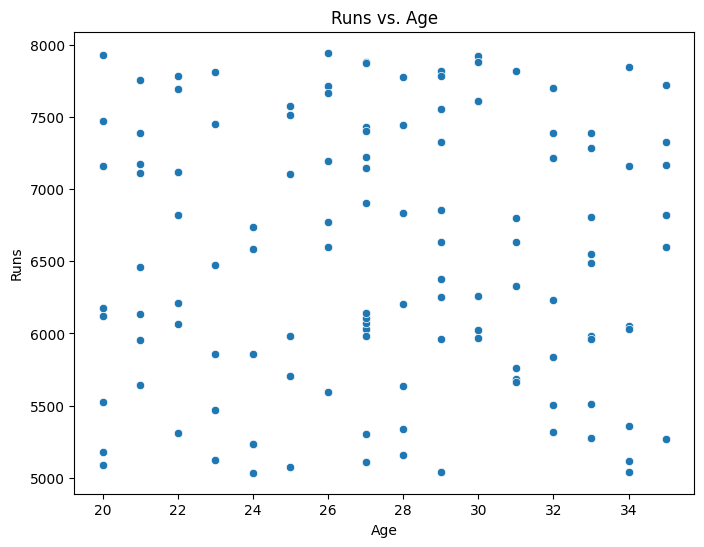

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Runs', data=merged_dataset)
plt.title('Runs vs. Age')
plt.xlabel('Age')
plt.ylabel('Runs')
plt.show()

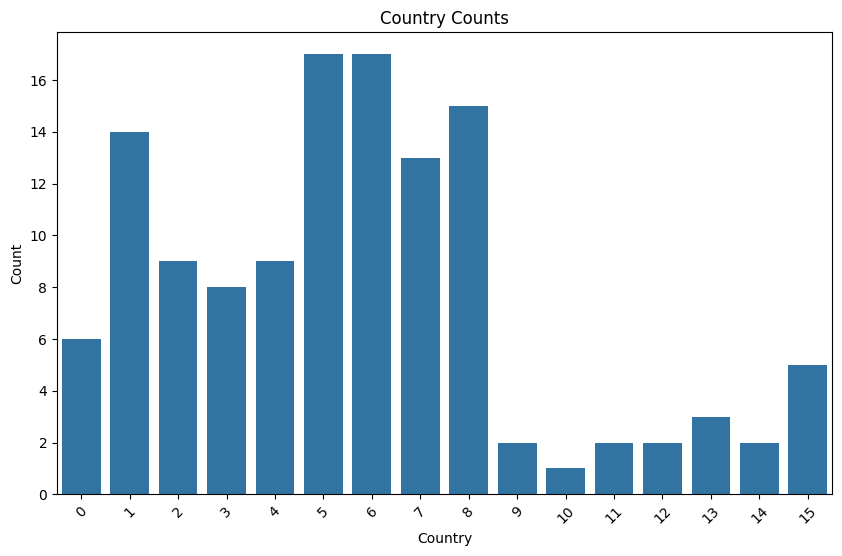

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=dataset)
plt.title('Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

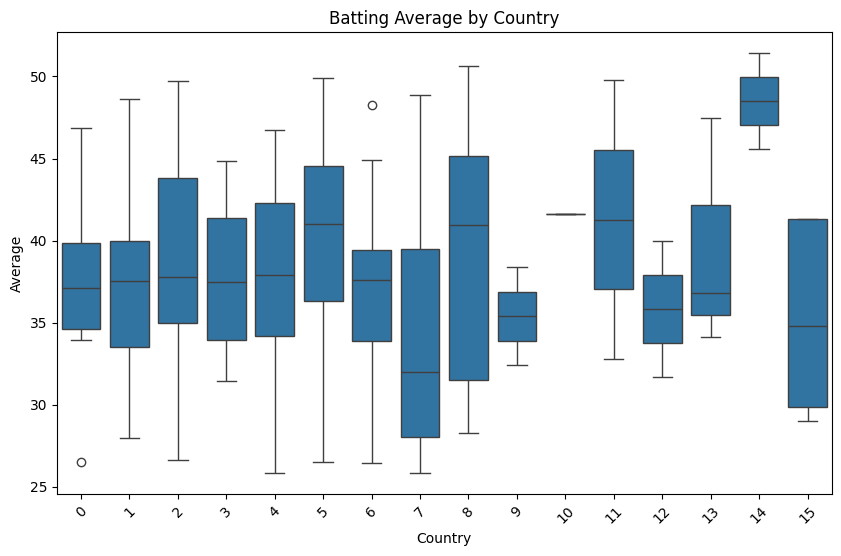

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Avg', data=dataset)
plt.title('Batting Average by Country')
plt.xlabel('Country')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

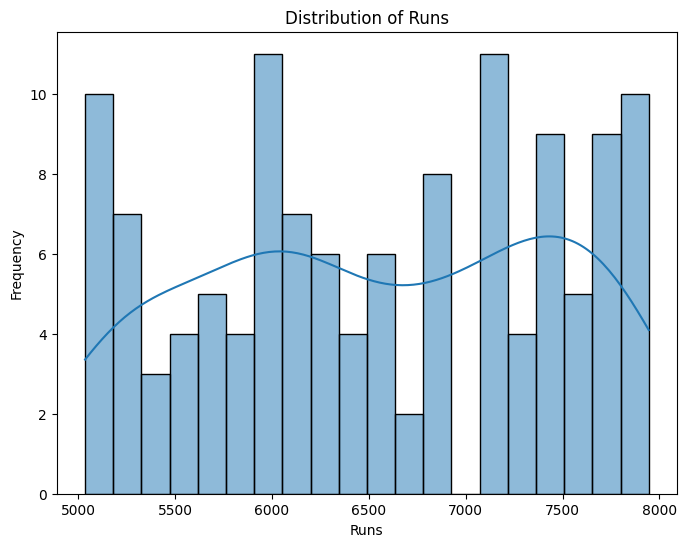

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_dataset['Runs'], bins=20, kde=True)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

<ipython-input-193-e5464606b775>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_dataset.corr(), annot=True, cmap='coolwarm')


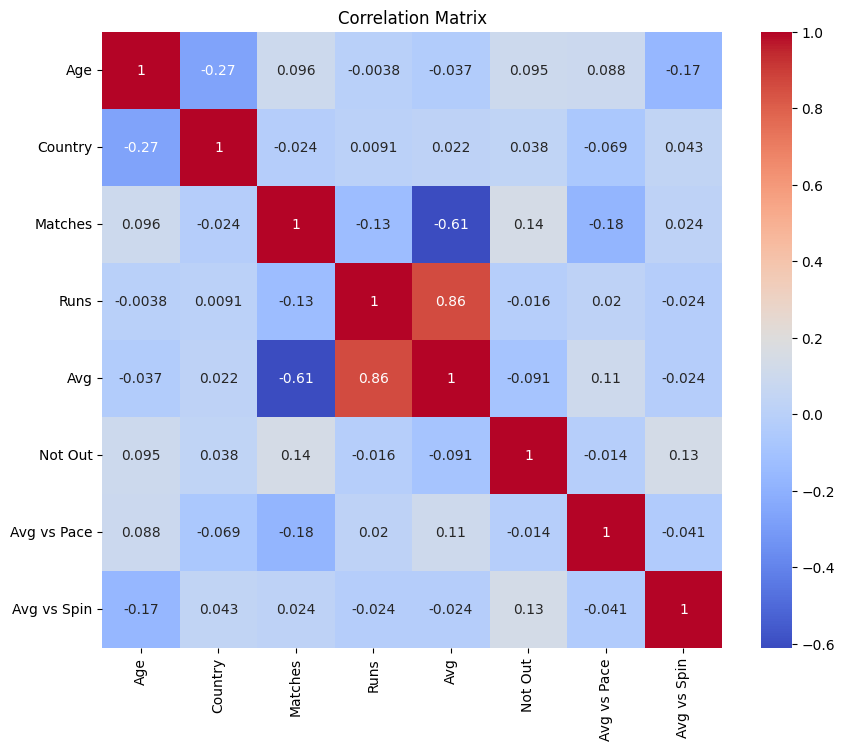

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

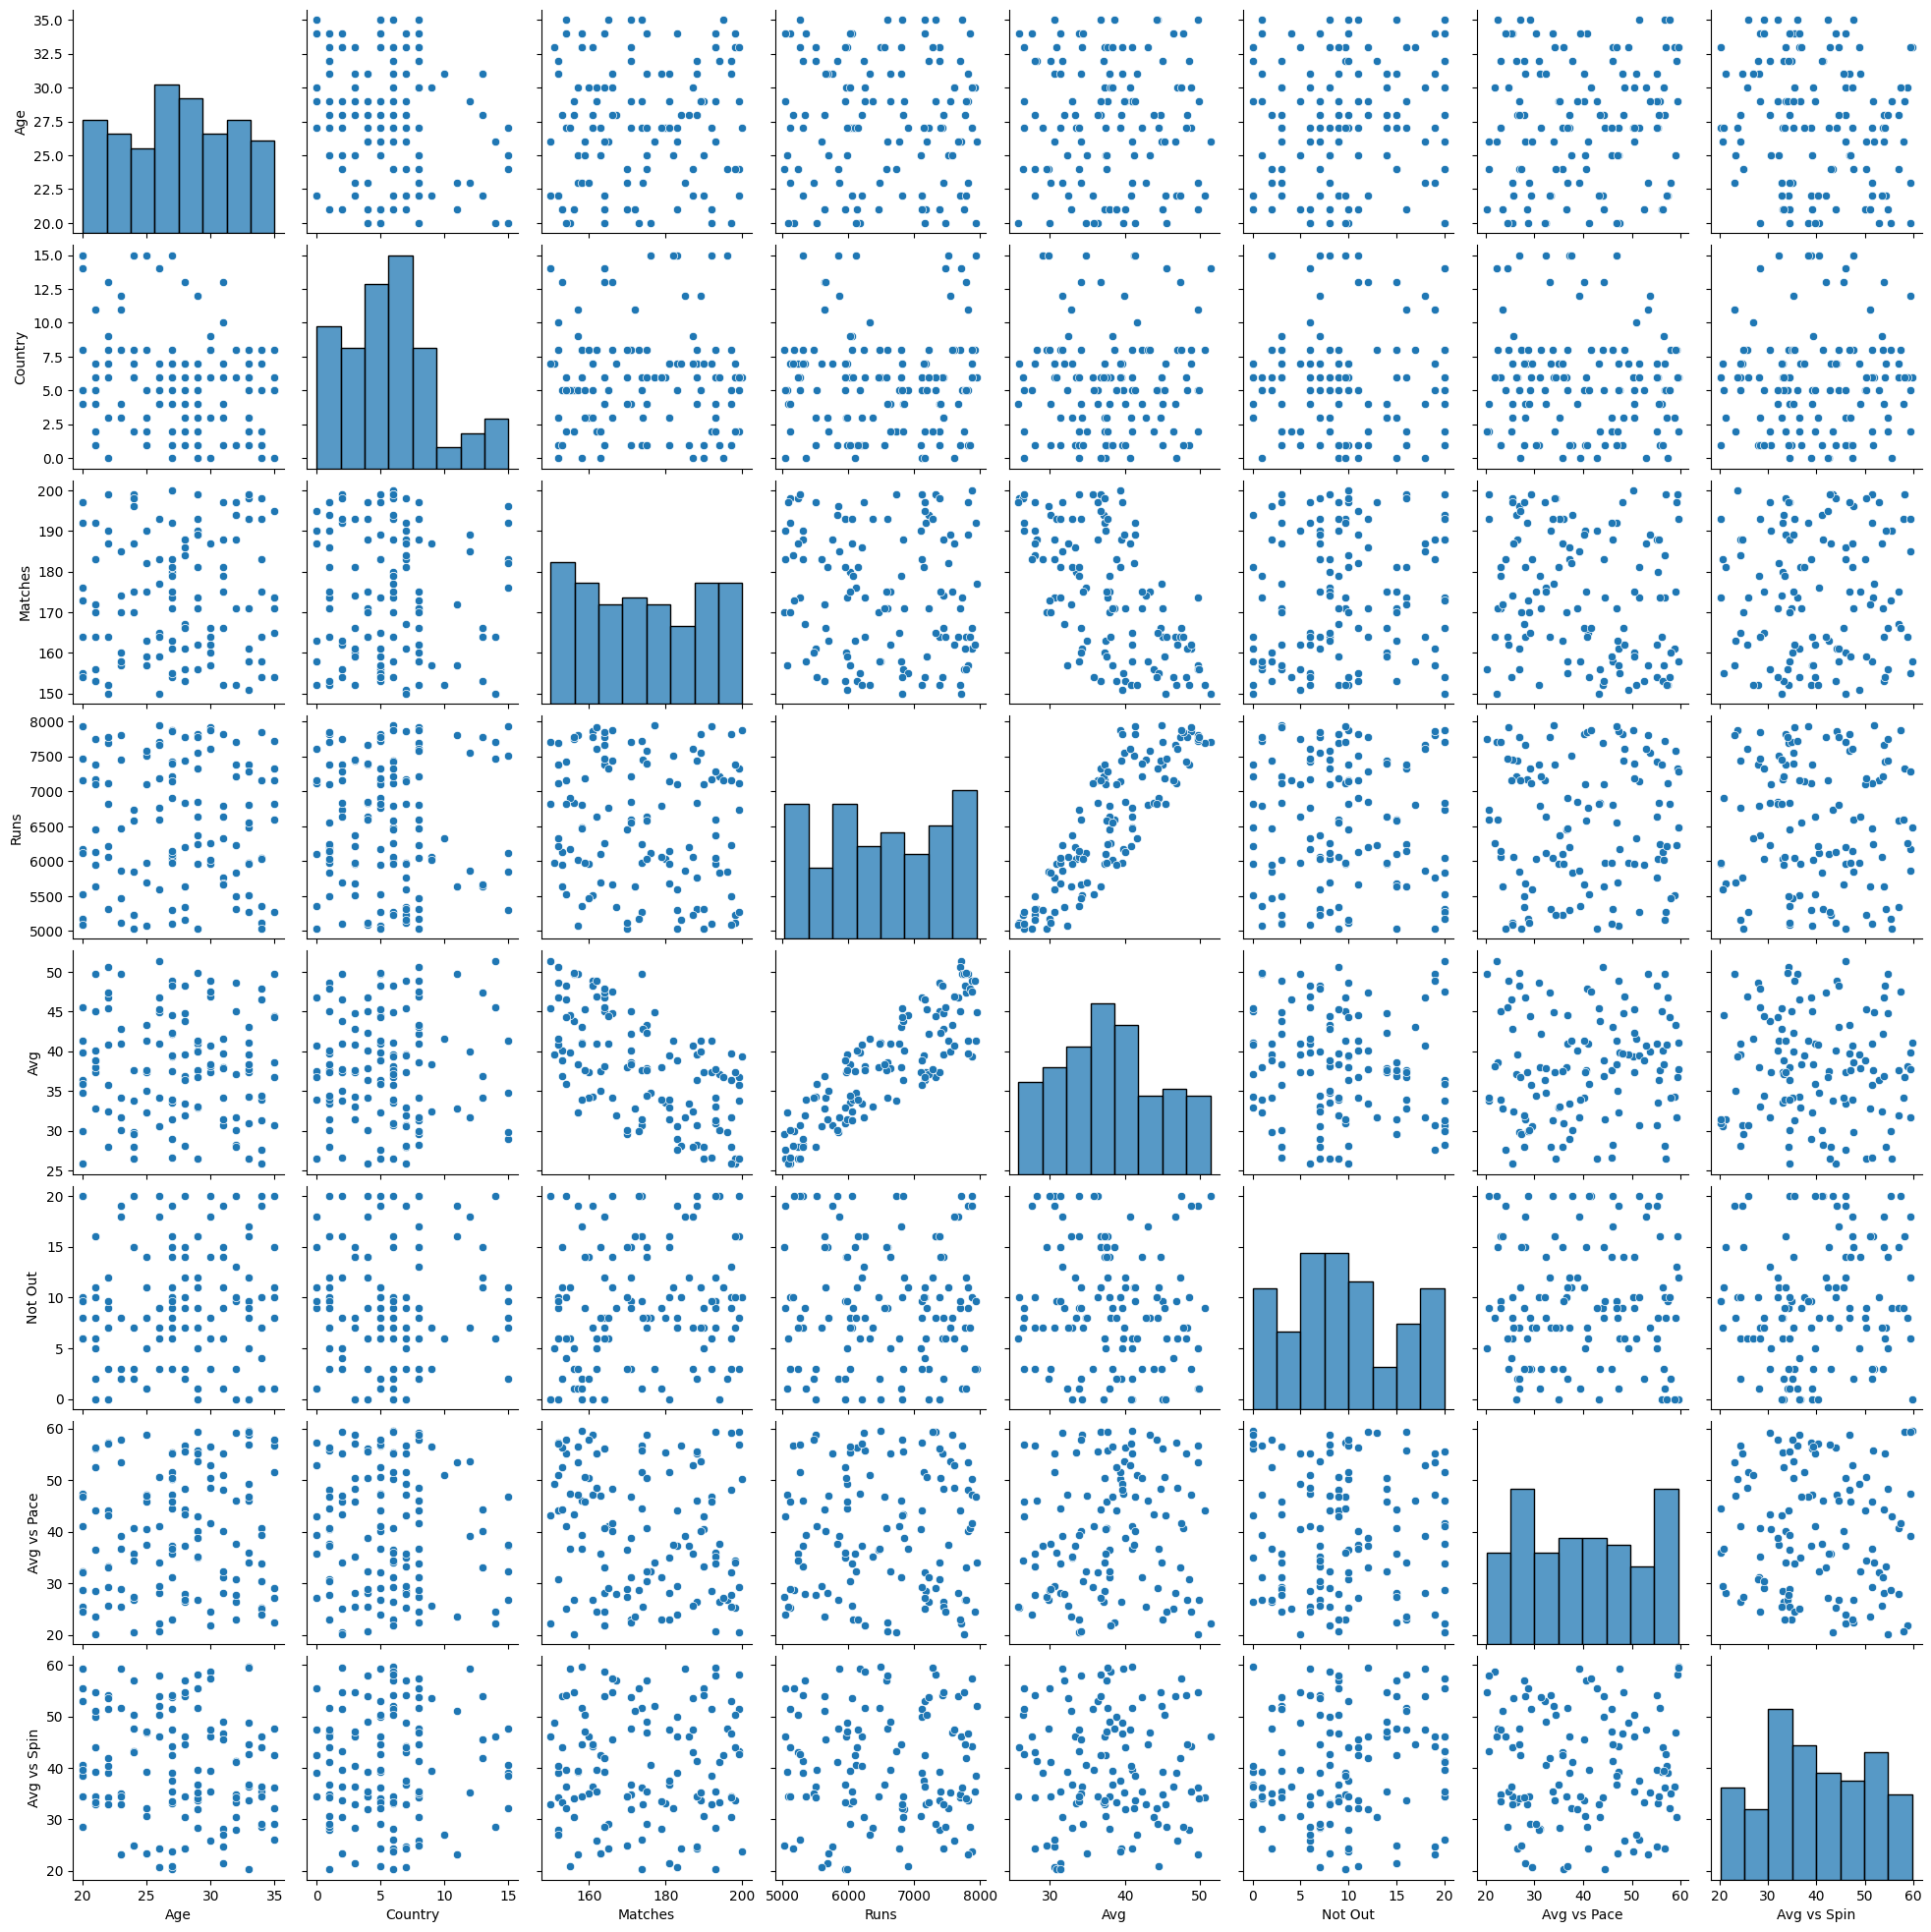

In [ ]:
sns.pairplot(dataset)